### Imports
* Note that module level tolerances are printed on module import. 
  * These can be overriden after import by just setting them eg. `mseutils.MZ_PPM = 7`


In [1]:
import mseutils
import os #just needed for loading datafiles

Global Tolerances:
####################
RT_WINDOW : 0.06
CCS_PPT : 10
MZ_PPM : 5
MS2_PPM : 25
####################


### Get Data Files from Module Path

In [2]:
modpath = mseutils.__path__[0]
data_path = os.path.join(modpath,'..','examples','data')
rep_file = os.path.join(data_path,"SW218968-1_replicated.csv")
rep_frag_file = os.path.join(data_path,"SW218968-1_rep_fragments.csv")
mgf_file = os.path.join(data_path,"20160928_SW218968-1_iDTs_CPPIS.mgf")


### Load Replicated CSV files
The `load_rep_and_frags_csv` func from the `file_parsers` reads in a replicated parent mass csv and the accompanying fragments file. The resulting `MseSpec`'s are then combined based on retetion time, drift time (ccs), and parent mz. Their fragments are added and averaged (m/z and intensity).

In [3]:
rep_mse_specs = mseutils.file_parsers.load_rep_and_frags_csv(rep_file,rep_frag_file)

reading csv file and grouping...
creating MseSpecs


processing file: 100%|█████████████████████████████████████████████████████████| 1588/1588 [00:02<00:00, 586.54it/s]


0.055


combining MseSpec's: 100%|██████████████████████████████████████████████████████| 840/840 [00:00<00:00, 3031.06it/s]


840 combined spec (47.10%)


### Load a MGF file
You can also load a mgf file directly by using the `load_mgf` function in `file_parsers`.

In [4]:
mgf_mse_specs = mseutils.file_parsers.load_mgf(mgf_file)

loading mgf: 3753it [00:05, 694.10it/s]


## MseSpec Objects
The `MseSpec` object is pretty powerful class that holds information about an MSe spectrum as the name might suggest. 

This provides access to :
* parent mz (mse.mz)
* ccs (mse.mz)
* retention time (in min) (mse.rt)
* ms2_data (mse.ms2_data)
* the number of spectra that were combined to make it up (mse.n)
* and their mgf filenames (mse.mgf_files)
* and others...
    * like a ms2 fingerprint (mse.ms2vect) made by binning (1 amu) ms2_data

In [5]:
mse = rep_mse_specs[0]
print("m/z: {}".format(mse.mz))
print("mse: {}".format(mse.ccs))
print("rt: {}".format(mse.rt))
print("ms2 data: {}".format(mse.ms2_data))

m/z: 151.0336 +/- 7.6e-05
mse: 102.9200 +/- 1
rt: 3.8380 +/- 0.03
ms2 data: {MZ(mz=77.0385,z=1,ppm=25): 4095.5, MZ(mz=109.01135,z=1,ppm=25): 7175.5, MZ(mz=141.07045,z=1,ppm=25): 10618.5}


There is also a IPython/Jupyter Notebook hook for visualizing the ms2_data. The coloring is the matplotlib "viridis" color scheme and represents relative intensity of each fragment. 

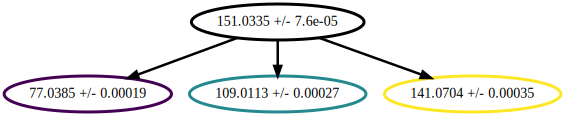

In [6]:
mse.ms2_data

### Source Fragmentation
To look at source fragments `src_frags` will compare each fragment within the retention time error window and check if the parent mz is in the ms2_data of another spec in that range. The fuction then adds the source frags to the `mse.src_frags` list. In the future I'll make the ms3 trees...


In [7]:
combined_src_frags = mseutils.src_frags(rep_mse_specs)

100%|███████████████████████████████████████████████████████████████████████████| 840/840 [00:00<00:00, 7412.16it/s]


combining srg frags...


Number of Specs with source fragments: 1


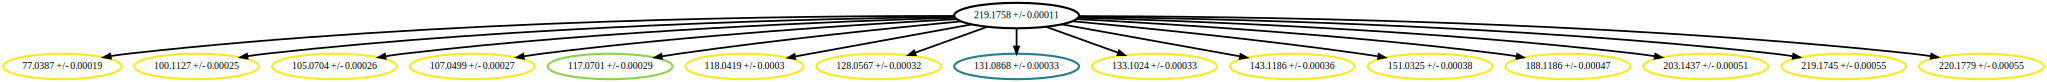

In [8]:
specs_wsrc_frags = [mse for mse in combined_src_frags if len(mse.src_frags)>0]
print("Number of Specs with source fragments: {}".format(len(specs_wsrc_frags)))
specs_wsrc_frags[0].ms2_data

In [9]:
specs_wsrc_frags[0].src_frags[0]

MseSpec(mz=203.1432 +/- 0.0001,rt=4.0845 +/- 0.03,ccs=129.2900 +/- 1.3)

I think this spec with source fragmentation in this file is noise, the copius number of fragments with small mass deltas of the above doesn't ring true to me... TBD

### Misc and etc

There's a bunch of smaller classes used for comparing mz's rt's and ccs's. They all incorporate some basic arithmatic and comparison operators. Below is an example with `mseutils.MZ` objects

In [10]:
mz1 = mseutils.MZ(123.4678,z=1)
mz2 = mseutils.MZ(123.4678001,z=1)
mz3 = mseutils.MZ(123.4600,z=1)
mz4 = mseutils.MZ(123.4678,z=2)
mz1 == mz2

True

In [11]:
mz1 == mz3

False

In [12]:
mz1==mz4

False

In [13]:
mz1 + mz3 

MZ(mz=246.9278,z=1,ppm=5)

In [14]:
mz1 > mz3

True